In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# data preparation
wine = pd.read_csv('PycharmProjects/ITP449/wineQualityReds.csv')
pd.set_option('display.max_columns',None)

wine.drop(['Wine'],axis=1,inplace=True)

x = wine.iloc[:,:11]
y = wine.iloc[:,11]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=2019)

wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
# build a classification tree model to predict quality 
dt = DecisionTreeClassifier(max_depth=6, random_state=2019)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred1 = dt.predict(x_train)


# how many in training partition - 1119
x_train.shape

(1119, 11)

In [31]:
#how maany in test partition - 480
x_test.shape

(480, 11)

In [32]:
# Finding the accuracy of the training partition - 0.729
accuracy = accuracy_score(y_pred1, y_train)
print (accuracy)

0.7292225201072386


In [33]:
# Finding the aaccuracy on the test partition - 0.556
accuracy = accuracy_score(y_pred,y_test)
print (accuracy)

0.55625


In [38]:
#8 predict the wine qulity
print("The wine quality of this wine is", dt.predict([[5.9,	0.645,	0.12,	2.0,	0.075,	32.0,	44.0,	0.99547,	3.57,	0.71,	10.2	]]))

The wine quality of this wine is [5]


In [35]:
# Predicting quality based on KNN classification model 

#Standardize all variables other than Quality
standardizer = StandardScaler()
standardizer.fit(x)
X = pd.DataFrame(standardizer.transform(x), columns = x.columns)
X


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


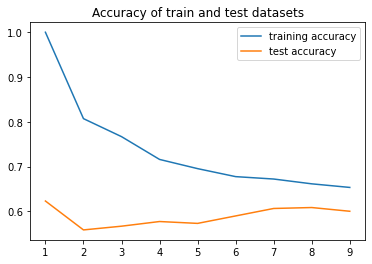

In [36]:
#  Build a Knn classification model to predict Quality based on all the remaining numeric variables.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2019,stratify=y)

neighbors = np.arange(1,10)
train_accuracy = np.empty(9)
test_accuracy = np.empty(9)

# Iterate on K ranging from 1 to 10
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    train_accuracy[k - 1] = knn.score(X_train, y_train)
    test_accuracy[k - 1] = knn.score(X_test, y_test)
    
# Plot the accuracy for the train and test datasets
plt.figure(2)
plt.plot(neighbors,train_accuracy,label="training accuracy")
plt.plot(neighbors,test_accuracy,label="test accuracy")
plt.legend()
plt.title('Accuracy of train and test datasets')
plt.show() 

# k = 1 produces the highest accuracy in the training group 

In [37]:
# Generate predictions for the test partition with the value of k=1.
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_test,y_test)
y_pred = model.predict(X_test)

y_pred


array([6, 6, 4, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 4, 5, 6, 5, 5, 5, 5,
       7, 7, 7, 6, 5, 6, 5, 4, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6,
       7, 5, 6, 5, 7, 7, 5, 6, 8, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       7, 6, 5, 7, 6, 5, 6, 5, 6, 7, 5, 7, 6, 5, 6, 5, 7, 7, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 8, 5, 6, 6, 7, 5, 6, 5,
       6, 7, 6, 7, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 4, 6, 6, 5, 6, 6, 6, 5, 6, 8, 5, 5, 5, 6,
       5, 6, 7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 7,
       5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 7, 7, 6, 6, 5, 6, 6, 5, 5, 6, 7, 6,
       5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 8, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 7, 5, 7, 5, 5, 5, 5, 7, 7, 5, 5, 5, 7, 6, 4, 7, 5, 5, 5, 6, 7,
       5, 5, 7, 5, 5, 6, 6, 5, 7, 6, 6, 5, 3, 7, 5, 5, 5, 6, 6, 5, 5, 7,
       7, 7, 6, 5, 7, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6,